<a href="https://colab.research.google.com/gist/Astray909/bd8957028781847fc0e5ee4a47f10b98/assignment_1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
"""
Justin Huang 101073186
GENERAL NOTE: Please print out numbers (i.e., accuracies, plots, etc.) so they are visible without me having to run your colab notebook. Use python's print() function.
"""

# import everything you might need

import torch
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import pandas as pd
from xgboost import XGBClassifier
import random
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import re
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

**QUESTION 1**

In [69]:
"""
Q1: Calculate the gradient of the f(x, y, z) = 7x2z – 2xy3 + 5z at (-1, -2, 3). What does this vector represent?

YOUR ANSWER HERE

This vector represents the direction that the function changes the most
"""

'\nQ1: Calculate the gradient of the f(x, y, z) = 7x2z – 2xy3 + 5z at (-1, -2, 3). What does this vector represent?\n\nYOUR ANSWER HERE\n\nThis vector represents the direction that the function changes the most\n'

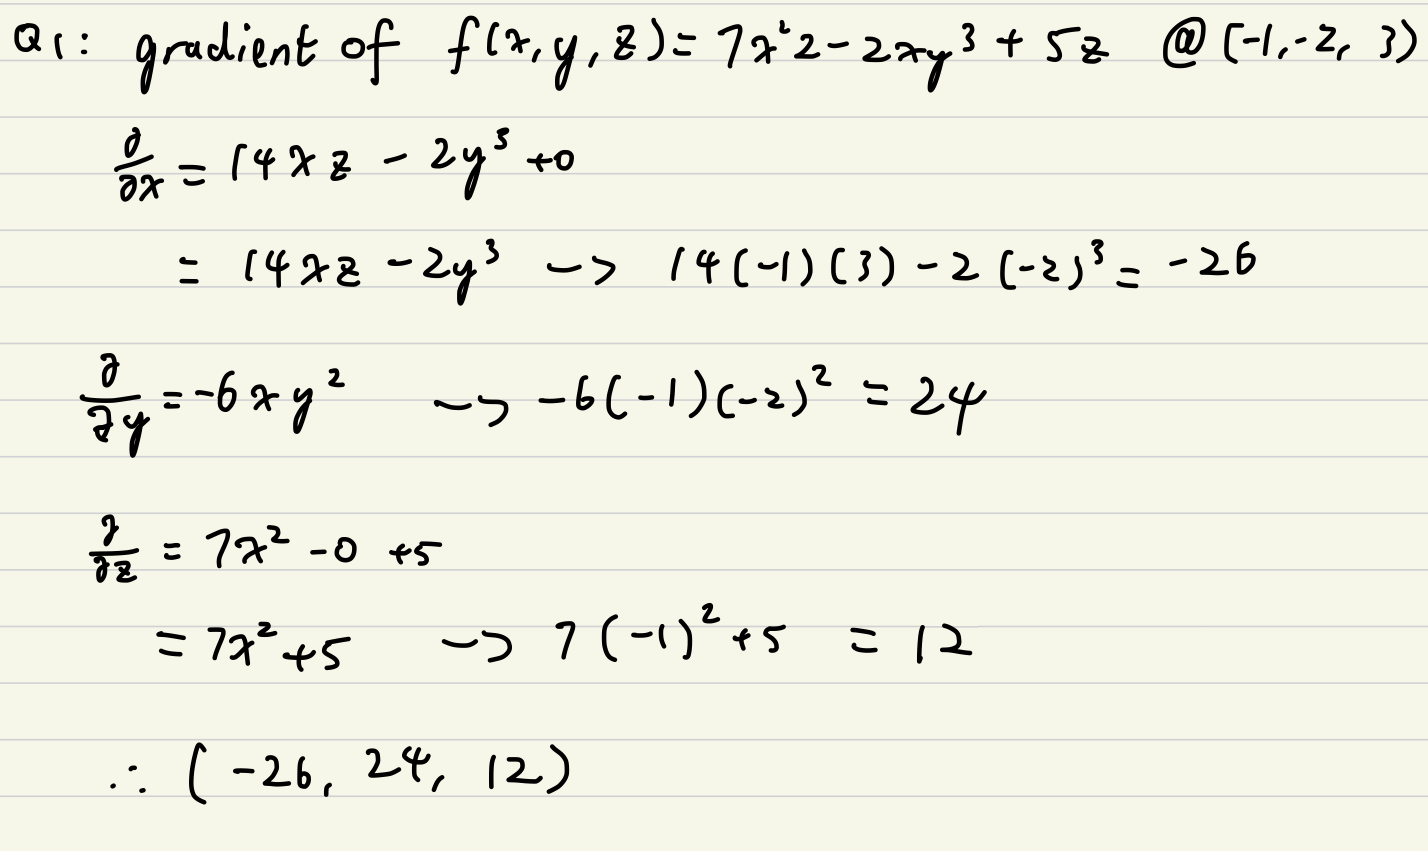

**QUESTION 2**

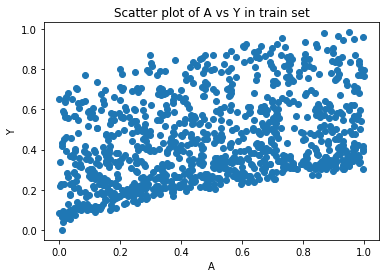

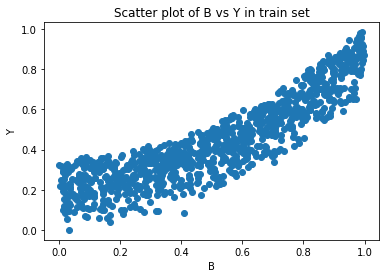

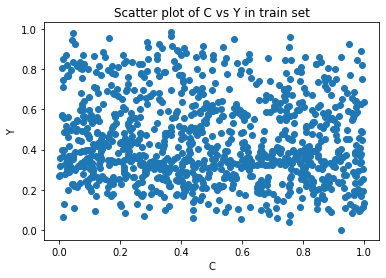

In [70]:
"""
Q2a: Use pandas to load train.csv, val.csv, and test.csv into three separate dataframes. Then, create three scatter plots of the train set with features A, B, and C on the x-axes and Y on the y-axes.

YOUR CODE BELOW, IN THIS CELL
"""
# load train.csv, val.csv, and test.csv into three separate dataframes
train_df = pd.read_csv("https://github.com/Astray909/SYSC4415_datasets/raw/main/Assignment%201/datasets/train.csv")
val_df = pd.read_csv("https://github.com/Astray909/SYSC4415_datasets/raw/main/Assignment%201/datasets/val.csv")
test_df = pd.read_csv("https://github.com/Astray909/SYSC4415_datasets/raw/main/Assignment%201/datasets/test.csv")

# create three scatter plots of the train set with features A on the x-axes and Y on the y-axes
plt.scatter(train_df['A'], train_df['Y'])
plt.xlabel('A');plt.ylabel('Y');plt.title('Scatter plot of A vs Y in train set')
plt.show()

# create three scatter plots of the train set with features B on the x-axes and Y on the y-axes
plt.scatter(train_df['B'], train_df['Y'])
plt.xlabel('B');plt.ylabel('Y');plt.title('Scatter plot of B vs Y in train set')
plt.show()

# create three scatter plots of the train set with features C on the x-axes and Y on the y-axes
plt.scatter(train_df['C'], train_df['Y'])
plt.xlabel('C');plt.ylabel('Y');plt.title('Scatter plot of C vs Y in train set')
plt.show()

In [71]:
"""
Q2b: If you were using A, B, and C to predict Y (i.e., using linear regression), how well do you think these features would perform? Do you think nonlinear functions would fit the data better? Why or why not?

YOUR ANSWER HERE

Feature A will perform the best out of the three, as it is the most linear with Y, 
feature B will perform worse than A but better than C, 
feature C appears to be more random than both A and B and does not seem linear

Nonlinear functions would not necessarily fit the data better, in the case of this training set, a simple nonelinear model would not fit the data very well, because the dataset exhibit high randomness from first glance
"""

'\nQ2b: If you were using A, B, and C to predict Y (i.e., using linear regression), how well do you think these features would perform? Do you think nonlinear functions would fit the data better? Why or why not?\n\nYOUR ANSWER HERE\n\nFeature A will perform the best out of the three, as it is the most linear with Y, \nfeature B will perform worse than A but better than C, \nfeature C appears to be more random than both A and B and does not seem linear\n\nNonlinear functions would not necessarily fit the data better, in the case of this training set, a simple nonelinear model would not fit the data very well, because the dataset exhibit high randomness from first glance\n'

In [72]:
"""
Q2c: The data is already normalized, how can you tell?

YOUR CODE AND ANSWER BELOW, IN THIS CELL

The data is already normalized because all the features have values from 0 to 1.
"""

'\nQ2c: The data is already normalized, how can you tell?\n\nYOUR CODE AND ANSWER BELOW, IN THIS CELL\n\nThe data is already normalized because all the features have values from 0 to 1.\n'

In [73]:
"""
Q2d: For each of the three input features, compute its square-root to create 3 additional features. Repeat for squaring the feature values to create another 3 features.
You now have 9 total input features: A, B, C, sqrt(A), sqrt(B), sqrt(C), A2, B2, C2. 
Do this for all three data splits (train, val, and test). You can think of these as polynomial kernels used in SVMs.

YOUR CODE BELOW, IN THIS CELL
"""
# Train set: compute its square-root to create 3 additional features. Repeat for squaring the feature values to create another 3 features.
train_df['sqrt_A'] = np.sqrt(train_df['A'])
train_df['sqrt_B'] = np.sqrt(train_df['B'])
train_df['sqrt_C'] = np.sqrt(train_df['C'])
train_df['A2'] = np.square(train_df['A'])
train_df['B2'] = np.square(train_df['B'])
train_df['C2'] = np.square(train_df['C'])

# Val set: compute its square-root to create 3 additional features. Repeat for squaring the feature values to create another 3 features.
val_df['sqrt_A'] = np.sqrt(val_df['A'])
val_df['sqrt_B'] = np.sqrt(val_df['B'])
val_df['sqrt_C'] = np.sqrt(val_df['C'])
val_df['A2'] = np.square(val_df['A'])
val_df['B2'] = np.square(val_df['B'])
val_df['C2'] = np.square(val_df['C'])

# Test set: compute its square-root to create 3 additional features. Repeat for squaring the feature values to create another 3 features.
test_df['sqrt_A'] = np.sqrt(test_df['A'])
test_df['sqrt_B'] = np.sqrt(test_df['B'])
test_df['sqrt_C'] = np.sqrt(test_df['C'])
test_df['A2'] = np.square(test_df['A'])
test_df['B2'] = np.square(test_df['B'])
test_df['C2'] = np.square(test_df['C'])

# Print a few lines of each dataframe
print("Train\n")
print(train_df.head(5))
print("Val\n")
print(val_df.head(5))
print("Test\n")
print(test_df.head(5))

Train

          A         B         C         Y  Label    sqrt_A    sqrt_B  \
0  0.433429  0.684660  0.100264  0.554477      5  0.658353  0.827442   
1  0.596584  0.427275  0.972302  0.344430      3  0.772389  0.653663   
2  0.884875  0.566586  0.014994  0.555790      5  0.940678  0.752719   
3  0.145045  0.427584  0.756287  0.228959      2  0.380848  0.653899   
4  0.237964  0.684935  0.348287  0.481648      4  0.487816  0.827608   

     sqrt_C        A2        B2        C2  
0  0.316645  0.187861  0.468759  0.010053  
1  0.986054  0.355913  0.182564  0.945371  
2  0.122450  0.783005  0.321020  0.000225  
3  0.869648  0.021038  0.182828  0.571970  
4  0.590159  0.056627  0.469136  0.121304  
Val

          A         B         C         Y  Label    sqrt_A    sqrt_B  \
0  0.225478  0.417502  0.658253  0.261007      2  0.474845  0.646144   
1  0.730810  0.025166  0.219302  0.300882      2  0.854874  0.158637   
2  0.098021  0.858857  0.857660  0.568094      5  0.313084  0.926745   
3  

**QUESTION 3**

            A         B         C
0    0.433429  0.684660  0.100264
1    0.596584  0.427275  0.972302
2    0.884875  0.566586  0.014994
3    0.145045  0.427584  0.756287
4    0.237964  0.684935  0.348287
..        ...       ...       ...
995  0.736293  0.142247  0.363417
996  0.995758  0.275269  0.139446
997  0.907777  0.842842  0.993105
998  0.021015  0.736657  0.698862
999  0.974958  0.733584  0.120631

[1000 rows x 3 columns]
            Y
0    0.554477
1    0.344430
2    0.555790
3    0.228959
4    0.481648
..        ...
995  0.305443
996  0.403648
997  0.753379
998  0.393484
999  0.708447

[1000 rows x 1 columns]
            A         B         C         Y  Label    sqrt_A    sqrt_B  \
0    0.433429  0.684660  0.100264  0.554477      5  0.658353  0.827442   
1    0.596584  0.427275  0.972302  0.344430      3  0.772389  0.653663   
2    0.884875  0.566586  0.014994  0.555790      5  0.940678  0.752719   
3    0.145045  0.427584  0.756287  0.228959      2  0.380848  0.653899   
4   

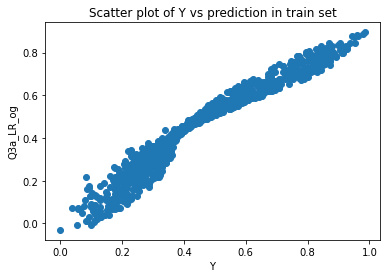

In [74]:
"""
Q3a: Train a linear regression model on the train set using only the 3 original input features.

YOUR CODE BELOW, IN THIS CELL
"""
# Train a linear regression model on the train set
train_features_original = train_df[["A", "B", "C"]]
print(train_features_original)
train_y = train_df[["Y"]]
print(train_y)
reg = LinearRegression().fit(train_features_original, train_y)

# Make predictions
train_predictions = reg.predict(train_features_original)
train_df['Q3a_LR_og'] = train_predictions

# Show the model prediction
print(train_df)

# create three scatter plot of the train set of Y and pred values
plt.scatter(train_df['Y'], train_df['Q3a_LR_og'])
plt.xlabel('Y');plt.ylabel('Q3a_LR_og');plt.title('Scatter plot of Y vs prediction in train set')
plt.show()

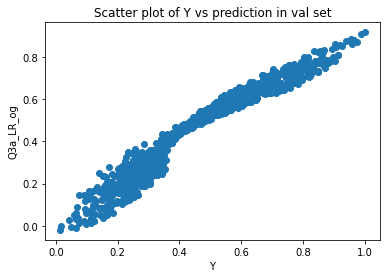

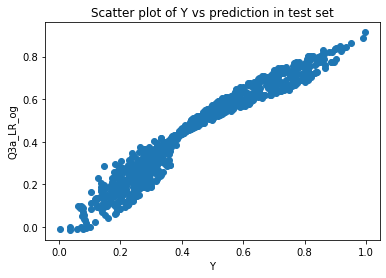

            A         B         C         Y  Label    sqrt_A    sqrt_B  \
0    0.225478  0.417502  0.658253  0.261007      2  0.474845  0.646144   
1    0.730810  0.025166  0.219302  0.300882      2  0.854874  0.158637   
2    0.098021  0.858857  0.857660  0.568094      5  0.313084  0.926745   
3    0.906471  0.476743  0.233213  0.482853      4  0.952088  0.690466   
4    0.701059  0.791579  0.512961  0.691283      6  0.837293  0.889707   
..        ...       ...       ...       ...    ...       ...       ...   
995  0.468737  0.426688  0.987345  0.313965      2  0.684644  0.653213   
996  0.836003  0.026912  0.917088  0.274371      2  0.914332  0.164048   
997  0.265104  0.150309  0.033106  0.214990      1  0.514882  0.387697   
998  0.467034  0.624725  0.627226  0.475714      4  0.683399  0.790396   
999  0.847969  0.883448  0.987031  0.789716      7  0.920852  0.939919   

       sqrt_C        A2        B2        C2  Q3a_LR_og  
0    0.811328  0.050840  0.174308  0.433297   0.301262

In [75]:
"""
Q3b: What are the mean absolute errors of the train set, val set, and test sets using this model? Did the model overfit the train set?

YOUR CODE AND ANSWER BELOW, IN THIS CELL

The MAE obtained for train, val, and test set are all very closly to each other at around 0.04, meaning the model did not overfit the train set
"""
# Make predictions on val set
val_features_original = val_df[["A", "B", "C"]]
val_y = val_df[["Y"]]
val_predictions = reg.predict(val_features_original)
val_df['Q3a_LR_og'] = val_predictions

# create three scatter plot of the val set of Y and pred values
plt.scatter(val_df['Y'], val_df['Q3a_LR_og'])
plt.xlabel('Y');plt.ylabel('Q3a_LR_og');plt.title('Scatter plot of Y vs prediction in val set')
plt.show()

# Make predictions on test set
test_features_original = test_df[["A", "B", "C"]]
test_y = test_df[["Y"]]
test_predictions = reg.predict(test_features_original)
test_df['Q3a_LR_og'] = test_predictions

# create three scatter plot of the test set of Y and pred testues
plt.scatter(test_df['Y'], test_df['Q3a_LR_og'])
plt.xlabel('Y');plt.ylabel('Q3a_LR_og');plt.title('Scatter plot of Y vs prediction in test set')
plt.show()

print(val_df)
print(test_df)

# MSE of train
mse_train = mean_absolute_error(train_df[["Y"]].values, train_predictions)
print("\nmae_train: ")
print(mse_train)

# MSE of val
mse_val = mean_absolute_error(val_df[["Y"]].values, val_predictions)
print("\nmae_val: ")
print(mse_val)

# MSE of test
mse_test = mean_absolute_error(test_df[["Y"]].values, test_predictions)
print("\nmae_test: ")
print(mse_test)

In [76]:
"""
Q3c: What are the values of the 4 learned parameters (3 weights and 1 bias)? Do these values make sense given your scatter plots in Q2a?

YOUR CODE AND ANSWER BELOW, IN THIS CELL

Y = bias + weight_A * A + weight_B * B + weight_C * C

The values for each of the weights are 0.26851499  0.66435995 -0.06032162
The value for the bias is 0.00305307

The values make sense, as using feature A to perdict Y fits a linear model better than feature B, both are better than C.
"""

# The 4 learned parameters
print(reg.coef_)
print(reg.intercept_)

[[ 0.26851499  0.66435995 -0.06032162]]
[0.00305307]


In [77]:
"""
Q3d: Train another linear regression model using all 9 input features.

YOUR CODE BELOW, IN THIS CELL
"""

# Train with all 9 input features
train_features_all = train_df[["A", "B", "C", "sqrt_A", "sqrt_B", "sqrt_C", "A2", "B2", "C2"]]
print(train_features_all)
print(train_y)
reg_all = LinearRegression().fit(train_features_all, train_y)

            A         B         C    sqrt_A    sqrt_B    sqrt_C        A2  \
0    0.433429  0.684660  0.100264  0.658353  0.827442  0.316645  0.187861   
1    0.596584  0.427275  0.972302  0.772389  0.653663  0.986054  0.355913   
2    0.884875  0.566586  0.014994  0.940678  0.752719  0.122450  0.783005   
3    0.145045  0.427584  0.756287  0.380848  0.653899  0.869648  0.021038   
4    0.237964  0.684935  0.348287  0.487816  0.827608  0.590159  0.056627   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.736293  0.142247  0.363417  0.858075  0.377156  0.602841  0.542127   
996  0.995758  0.275269  0.139446  0.997877  0.524661  0.373425  0.991534   
997  0.907777  0.842842  0.993105  0.952773  0.918064  0.996547  0.824058   
998  0.021015  0.736657  0.698862  0.144964  0.858287  0.835980  0.000442   
999  0.974958  0.733584  0.120631  0.987400  0.856495  0.347320  0.950544   

           B2        C2  
0    0.468759  0.010053  
1    0.182564  0.945371

            A         B         C         Y  Label    sqrt_A    sqrt_B  \
0    0.433429  0.684660  0.100264  0.554477      5  0.658353  0.827442   
1    0.596584  0.427275  0.972302  0.344430      3  0.772389  0.653663   
2    0.884875  0.566586  0.014994  0.555790      5  0.940678  0.752719   
3    0.145045  0.427584  0.756287  0.228959      2  0.380848  0.653899   
4    0.237964  0.684935  0.348287  0.481648      4  0.487816  0.827608   
..        ...       ...       ...       ...    ...       ...       ...   
995  0.736293  0.142247  0.363417  0.305443      2  0.858075  0.377156   
996  0.995758  0.275269  0.139446  0.403648      3  0.997877  0.524661   
997  0.907777  0.842842  0.993105  0.753379      7  0.952773  0.918064   
998  0.021015  0.736657  0.698862  0.393484      3  0.144964  0.858287   
999  0.974958  0.733584  0.120631  0.708447      6  0.987400  0.856495   

       sqrt_C        A2        B2        C2  Q3a_LR_og  Q3e_LR_all  
0    0.316645  0.187861  0.468759  0.01005

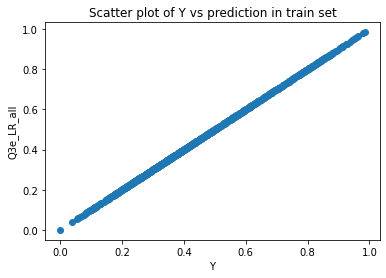

            A         B         C         Y  Label    sqrt_A    sqrt_B  \
0    0.225478  0.417502  0.658253  0.261007      2  0.474845  0.646144   
1    0.730810  0.025166  0.219302  0.300882      2  0.854874  0.158637   
2    0.098021  0.858857  0.857660  0.568094      5  0.313084  0.926745   
3    0.906471  0.476743  0.233213  0.482853      4  0.952088  0.690466   
4    0.701059  0.791579  0.512961  0.691283      6  0.837293  0.889707   
..        ...       ...       ...       ...    ...       ...       ...   
995  0.468737  0.426688  0.987345  0.313965      2  0.684644  0.653213   
996  0.836003  0.026912  0.917088  0.274371      2  0.914332  0.164048   
997  0.265104  0.150309  0.033106  0.214990      1  0.514882  0.387697   
998  0.467034  0.624725  0.627226  0.475714      4  0.683399  0.790396   
999  0.847969  0.883448  0.987031  0.789716      7  0.920852  0.939919   

       sqrt_C        A2        B2        C2  Q3a_LR_og  Q3e_LR_all  
0    0.811328  0.050840  0.174308  0.43329

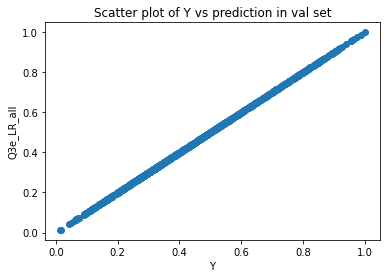

            A         B         C         Y  Label    sqrt_A    sqrt_B  \
0    0.731463  0.155831  0.182976  0.319177      2  0.855256  0.394755   
1    0.150801  0.173054  0.268754  0.162234      1  0.388331  0.415998   
2    0.080348  0.045691  0.560025  0.089554      0  0.283458  0.213753   
3    0.400330  0.327278  0.487487  0.280120      2  0.632716  0.572082   
4    0.313991  0.972323  0.615543  0.804159      7  0.560349  0.986064   
..        ...       ...       ...       ...    ...       ...       ...   
995  0.779213  0.107813  0.235017  0.316422      2  0.882731  0.328349   
996  0.674397  0.584119  0.643948  0.487773      4  0.821217  0.764276   
997  0.677368  0.472110  0.159772  0.441953      4  0.823024  0.687103   
998  0.897627  0.076090  0.418438  0.321844      3  0.947432  0.275845   
999  0.489602  0.784306  0.529095  0.636924      6  0.699716  0.885611   

       sqrt_C        A2        B2        C2  Q3a_LR_og  Q3e_LR_all  
0    0.427757  0.535038  0.024283  0.03348

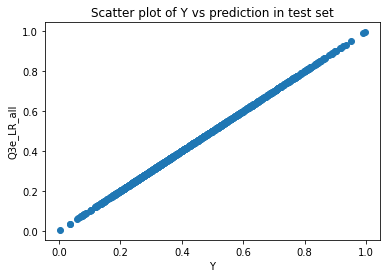


mae_train_all: 
2.6489755248107204e-05

mae_val_all: 
2.2842568580002835e-05

mae_test_all: 
2.606980306402873e-05


In [78]:
"""
Q3e: What are the mean absolute errors of each dataset, using this new model?

YOUR CODE BELOW, IN THIS CELL

The MAE for train set is:
2.6489755248113276e-05

MAE for val set: 
2.2842568580020315e-05

MAE for test set: 
2.606980306405382e-05
"""
# Make predictions on train set
train_predictions_all = reg_all.predict(train_features_all)
train_df['Q3e_LR_all'] = train_predictions_all

# Show the model prediction
print(train_df)

# create three scatter plot of the train set of Y and pred values
plt.scatter(train_df['Y'], train_df['Q3e_LR_all'])
plt.xlabel('Y');plt.ylabel('Q3e_LR_all');plt.title('Scatter plot of Y vs prediction in train set')
plt.show()

# Make predictions on val set
val_features_all = val_df[["A", "B", "C", "sqrt_A", "sqrt_B", "sqrt_C", "A2", "B2", "C2"]]
val_predictions_all = reg_all.predict(val_features_all)
val_df['Q3e_LR_all'] = val_predictions_all

# Show the model prediction
print(val_df)

# create three scatter plot of the val set of Y and pred values
plt.scatter(val_df['Y'], val_df['Q3e_LR_all'])
plt.xlabel('Y');plt.ylabel('Q3e_LR_all');plt.title('Scatter plot of Y vs prediction in val set')
plt.show()

# Make predictions on test set
test_features_all = test_df[["A", "B", "C", "sqrt_A", "sqrt_B", "sqrt_C", "A2", "B2", "C2"]]
test_predictions_all = reg_all.predict(test_features_all)
test_df['Q3e_LR_all'] = test_predictions_all

# Show the model prediction
print(test_df)

# create three scatter plot of the test set of Y and pred testues
plt.scatter(test_df['Y'], test_df['Q3e_LR_all'])
plt.xlabel('Y');plt.ylabel('Q3e_LR_all');plt.title('Scatter plot of Y vs prediction in test set')
plt.show()

# MSE of train
mse_train_all = mean_absolute_error(train_df[["Y"]].values, train_predictions_all)
print("\nmae_train_all: ")
print(mse_train_all)

# MSE of val
mse_val_all = mean_absolute_error(val_df[["Y"]].values, val_predictions_all)
print("\nmae_val_all: ")
print(mse_val_all)

# MSE of test
mse_test_all = mean_absolute_error(test_df[["Y"]].values, test_predictions_all)
print("\nmae_test_all: ")
print(mse_test_all)

In [79]:
"""
Q3f: How many learned parameters are there for this model, and what are their values?

YOUR CODE AND ANSWER BELOW, IN THIS CELL

There are a total of 9 weights and 1 bias

The parameter values are:
3.18658118e-03  4.12904461e-04 -6.66706794e-02  3.29369858e-01
5.77037044e-05  1.93867238e-04 -1.14337648e-03  6.63574154e-01
1.43711935e-04

The bias is:
0.03170074
"""

# The 4 learned parameters
print(reg_all.coef_)
print(reg_all.intercept_)

[[ 3.18658118e-03  4.12904461e-04 -6.66706794e-02  3.29369858e-01
   5.77037044e-05  1.93867238e-04 -1.14337648e-03  6.63574154e-01
   1.43711935e-04]]
[0.03170074]


In [80]:
"""
Q3g: Which model performs better? How can you explain the difference in performance?

YOUR ANSWER HERE

The model trained with all 9 inputs performs better. The difference in performance is due to it having more input features, square-root and square is able to
reduce the non-linear relationship in the original input data.
"""

'\nQ3g: Which model performs better? How can you explain the difference in performance?\n\nYOUR ANSWER HERE\n\nThe model trained with all 9 inputs performs better. The difference in performance is due to it having more input features, square-root and square is able to\nreduce the non-linear relationship in the original input data.\n'

**QUESTION 4**

            A         B         C         Y  Label    sqrt_A    sqrt_B  \
0    0.433429  0.684660  0.100264  0.554477      5  0.658353  0.827442   
1    0.596584  0.427275  0.972302  0.344430      3  0.772389  0.653663   
2    0.884875  0.566586  0.014994  0.555790      5  0.940678  0.752719   
3    0.145045  0.427584  0.756287  0.228959      2  0.380848  0.653899   
4    0.237964  0.684935  0.348287  0.481648      4  0.487816  0.827608   
..        ...       ...       ...       ...    ...       ...       ...   
995  0.736293  0.142247  0.363417  0.305443      2  0.858075  0.377156   
996  0.995758  0.275269  0.139446  0.403648      3  0.997877  0.524661   
997  0.907777  0.842842  0.993105  0.753379      7  0.952773  0.918064   
998  0.021015  0.736657  0.698862  0.393484      3  0.144964  0.858287   
999  0.974958  0.733584  0.120631  0.708447      6  0.987400  0.856495   

       sqrt_C        A2        B2        C2  Q3a_LR_og  Q3e_LR_all  \
0    0.316645  0.187861  0.468759  0.0100

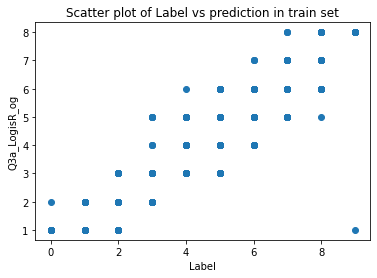

In [81]:
"""
Q4a: Use scikit-learn to train a logistic regression model on the train set using only the 3 original features. Again, just use the default hyper-parameters.

YOUR CODE BELOW, IN THIS CELL
"""
# Train a logistic regression model on the train set
train_features_original = train_df[["A", "B", "C"]]
train_y_label = train_df[["Label"]]
log_og = LogisticRegression().fit(train_features_original, train_y_label.values.ravel())

# Make predictions
train_predictions_logis = log_og.predict(train_features_original)
train_df['Q3a_LogisR_og'] = train_predictions_logis

# Show the model prediction
print(train_df)

# create three scatter plot of the train set of Label and pred values
plt.scatter(train_df['Label'], train_df['Q3a_LogisR_og'])
plt.xlabel('Label');plt.ylabel('Q3a_LogisR_og');plt.title('Scatter plot of Label vs prediction in train set')
plt.show()

In [82]:
"""
Q4b: What are the overall accuracies of the train, val, and test sets? Use scikit-learn’s accuracy_score metric.

YOUR CODE BELOW, IN THIS CELL
"""
# accuracy of train set
accu_train_og = accuracy_score(train_y_label, train_predictions_logis)
print("Accuracy for train set: ")
print(accu_train_og)

# logistic regression model on the val set
val_features_original = val_df[["A", "B", "C"]]
val_y_label = val_df[["Label"]]
val_predictions_logis = log_og.predict(val_features_original)
val_df['Q3a_LogisR_og'] = val_predictions_logis
accu_val_og = accuracy_score(val_y_label, val_predictions_logis)
print("Accuracy for val set: ")
print(accu_val_og)

# logistic regression model on the test set
test_features_original = test_df[["A", "B", "C"]]
test_y_label = test_df[["Label"]]
test_predictions_logis = log_og.predict(test_features_original)
test_df['Q3a_LogisR_og'] = test_predictions_logis
accu_test_og = accuracy_score(test_y_label, test_predictions_logis)
print("Accuracy for test set: ")
print(accu_test_og)

Accuracy for train set: 
0.528
Accuracy for val set: 
0.452
Accuracy for test set: 
0.481


            A         B         C         Y  Label    sqrt_A    sqrt_B  \
0    0.433429  0.684660  0.100264  0.554477      5  0.658353  0.827442   
1    0.596584  0.427275  0.972302  0.344430      3  0.772389  0.653663   
2    0.884875  0.566586  0.014994  0.555790      5  0.940678  0.752719   
3    0.145045  0.427584  0.756287  0.228959      2  0.380848  0.653899   
4    0.237964  0.684935  0.348287  0.481648      4  0.487816  0.827608   
..        ...       ...       ...       ...    ...       ...       ...   
995  0.736293  0.142247  0.363417  0.305443      2  0.858075  0.377156   
996  0.995758  0.275269  0.139446  0.403648      3  0.997877  0.524661   
997  0.907777  0.842842  0.993105  0.753379      7  0.952773  0.918064   
998  0.021015  0.736657  0.698862  0.393484      3  0.144964  0.858287   
999  0.974958  0.733584  0.120631  0.708447      6  0.987400  0.856495   

       sqrt_C        A2        B2        C2  Q3a_LR_og  Q3e_LR_all  \
0    0.316645  0.187861  0.468759  0.0100

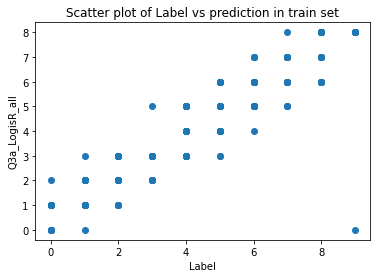

In [83]:
"""
Q4c: Train another logistic regression model on the train set using all 9 features. If it doesn’t converge, set max_iter to 5,000.

YOUR CODE BELOW, IN THIS CELL
"""
# Train a logistic regression model on the train set
train_features_all = train_df[["A", "B", "C", "sqrt_A", "sqrt_B", "sqrt_C", "A2", "B2", "C2"]]
train_y_label = train_df[["Label"]]
log_og_all = LogisticRegression(max_iter = 5000).fit(train_features_all, train_y_label.values.ravel())

# Make predictions
train_predictions_logis_all = log_og_all.predict(train_features_all)
train_df['Q3a_LogisR_all'] = train_predictions_logis_all

# Show the model prediction
print(train_df)

# create three scatter plot of the train set of Label and pred values
plt.scatter(train_df['Label'], train_df['Q3a_LogisR_all'])
plt.xlabel('Label');plt.ylabel('Q3a_LogisR_all');plt.title('Scatter plot of Label vs prediction in train set')
plt.show()

In [84]:
"""
Q4d: Repeat b, but with your new logistic regression model.

YOUR CODE BELOW, IN THIS CELL
"""
# accuracy of train set
accu_train_all = accuracy_score(train_y_label, train_predictions_logis_all)
print("Accuracy for train set: ")
print(accu_train_all)

# logistic regression model on the val set
val_features_all = val_df[["A", "B", "C", "sqrt_A", "sqrt_B", "sqrt_C", "A2", "B2", "C2"]]
val_y_label = val_df[["Label"]]
val_predictions_logis_all = log_og_all.predict(val_features_all)
val_df['Q3a_LogisR_all'] = val_predictions_logis_all
accu_val_all = accuracy_score(val_y_label, val_predictions_logis_all)
print("Accuracy for val set: ")
print(accu_val_all)

# logistic regression model on the test set
test_features_all = test_df[["A", "B", "C", "sqrt_A", "sqrt_B", "sqrt_C", "A2", "B2", "C2"]]
test_y_label = test_df[["Label"]]
test_predictions_logis_all = log_og_all.predict(test_features_all)
test_df['Q3a_LogisR_all'] = test_predictions_logis_all
accu_test_all = accuracy_score(test_y_label, test_predictions_logis_all)
print("Accuracy for test set: ")
print(accu_test_all)

Accuracy for train set: 
0.635
Accuracy for val set: 
0.559
Accuracy for test set: 
0.579


In [85]:
"""
Q4e: XGBoost is pre-installed on Google Colab. One hyper-parameter is the depth of the tree (called max_depth). Find the optimal value of max_depth, all other hyper-parameters can be ignored for this question.
That is, your model should look like: model = XGBClassifier(max_depth=L).fit(X,y). 
Hint: the test set should not be used to search for hyper-parameters. Train these models using only the 3 original features.

YOUR CODE BELOW, IN THIS CELL
"""
# Train a XGBoost regression model on the train set
train_features_xgb = train_df[["A", "B", "C"]]
train_y_label_xgb = train_df[["Label"]]

# Find optimal max_depth
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(train_features_xgb, train_y_label_xgb.values.ravel())

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_max_depth = re.findall(r'\d+', str(grid_result.best_params_))[0]
log_xgb = XGBClassifier(best_max_depth).fit(train_features_xgb, train_y_label_xgb.values.ravel())

# Make predictions
train_predictions_logis_xgb = log_xgb.predict(train_features_xgb)
train_df['Q3a_LogisR_xgb'] = train_predictions_logis_xgb

# Show the model prediction
print(train_df)

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best: -0.431979 using {'max_depth': 7}
-1.081454 (0.053237) with: {'max_depth': 1}
-0.532320 (0.072807) with: {'max_depth': 3}
-0.444175 (0.081373) with: {'max_depth': 5}
-0.431979 (0.076848) with: {'max_depth': 7}
-0.434044 (0.085377) with: {'max_depth': 9}
            A         B         C         Y  Label    sqrt_A    sqrt_B  \
0    0.433429  0.684660  0.100264  0.554477      5  0.658353  0.827442   
1    0.596584  0.427275  0.972302  0.344430      3  0.772389  0.653663   
2    0.884875  0.566586  0.014994  0.555790      5  0.940678  0.752719   
3    0.145045  0.427584  0.756287  0.228959      2  0.380848  0.653899   
4    0.237964  0.684935  0.348287  0.481648      4  0.487816  0.827608   
..        ...       ...       ...       ...    ...       ...       ...   
995  0.736293  0.142247  0.363417  0.305443      2  0.858075  0.377156   
996  0.995758  0.275269  0.139446  0.403648      3  0.997877  0.524661  

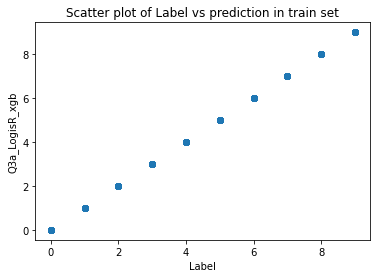

Accuracy for train set: 
1.0


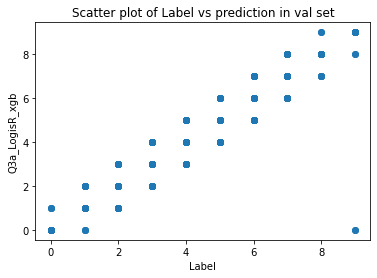

Accuracy for val set: 
0.827


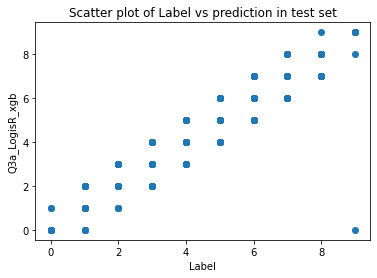

Accuracy for test set: 
0.84


In [86]:
"""
Q4f: Repeat Step b, but with your new XGBoost model (with the max_depth chosen from e).

YOUR CODE BELOW, IN THIS CELL
"""
# create three scatter plot of the train set of Label and pred values
plt.scatter(train_df['Label'], train_df['Q3a_LogisR_xgb'])
plt.xlabel('Label');plt.ylabel('Q3a_LogisR_xgb');plt.title('Scatter plot of Label vs prediction in train set')
plt.show()

# accuracy of train set
accu_train_xgb = accuracy_score(train_y_label_xgb, train_predictions_logis_xgb)
print("Accuracy for train set: ")
print(accu_train_xgb)

# logistic regression model on the val set
val_features_xgb = val_df[["A", "B", "C"]]
val_y_label_xgb = val_df[["Label"]]
val_predictions_logis_xgb = log_xgb.predict(val_features_xgb)
val_df['Q3a_LogisR_xgb'] = val_predictions_logis_xgb

# create three scatter plot of the val set of Label and pred values
plt.scatter(val_df['Label'], val_df['Q3a_LogisR_xgb'])
plt.xlabel('Label');plt.ylabel('Q3a_LogisR_xgb');plt.title('Scatter plot of Label vs prediction in val set')
plt.show()
accu_val_xgb = accuracy_score(val_y_label_xgb, val_predictions_logis_xgb)
print("Accuracy for val set: ")
print(accu_val_xgb)

# logistic regression model on the test set
test_features_xgb = test_df[["A", "B", "C"]]
test_y_label_xgb = test_df[["Label"]]
test_predictions_logis_xgb = log_xgb.predict(test_features_xgb)
test_df['Q3a_LogisR_xgb'] = test_predictions_logis_xgb

# create three scatter plot of the test set of Label and pred testues
plt.scatter(test_df['Label'], test_df['Q3a_LogisR_xgb'])
plt.xlabel('Label');plt.ylabel('Q3a_LogisR_xgb');plt.title('Scatter plot of Label vs prediction in test set')
plt.show()
accu_test_xgb = accuracy_score(test_y_label_xgb, test_predictions_logis_xgb)
print("Accuracy for test set: ")
print(accu_test_xgb)

In [87]:
"""
Q4g: Of your 3 models—two logistic regression models and one XGBoost model—which performs best on the test set? Why do you think this is the case?

YOUR ANSWER HERE

XGBoost model performs the best, scoring over 0.8 on both val and test sets, while the two logistic regression models have scores lower than 0.6.
The XGBoost is a more complicated model that performs better on non-linear dataset. Logistic regression on the other hand while being efficient, performs worse compared to XGBoost on complex and non-linear datasets.
"""

'\nQ4g: Of your 3 models—two logistic regression models and one XGBoost model—which performs best on the test set? Why do you think this is the case?\n\nYOUR ANSWER HERE\n\nXGBoost model performs the best, scoring over 0.8 on both val and test sets, while the two logistic regression models have scores lower than 0.6.\nThe XGBoost is a more complicated model that performs better on non-linear dataset. Logistic regression on the other hand while being efficient, performs worse compared to XGBoost on complex and non-linear datasets.\n'

**QUESTION 5**

In [88]:
"""
Q5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.
This is a multi-class classification problem, which of the following loss functions, available in PyTorch, best suits our task? Explain briefly.
torch.nn.CrossEntropyLoss()
torch.nn.MSELoss()
torch.nn.BCELoss()


YOUR ANSWER HERE

torch.nn.CrossEntropyLoss() is the best option out of the three, as the goal is to predict class label
MSELoss works best in regression problems, the goal is usually to perdict a continuous value
BCELoss works best in predicting binary labels, which is not the case with this specific dataset (which is a multi class label)
"""

'\nQ5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.\nThis is a multi-class classification problem, which of the following loss functions, available in PyTorch, best suits our task? Explain briefly.\ntorch.nn.CrossEntropyLoss()\ntorch.nn.MSELoss()\ntorch.nn.BCELoss()\n\n\nYOUR ANSWER HERE\n\ntorch.nn.CrossEntropyLoss() is the best option out of the three, as the goal is to predict class label\nMSELoss works best in regression problems, the goal is usually to perdict a continuous value\nBCELoss works best in predicting binary labels, which is not the case with this specific dataset (which is a multi class label)\n'

In [89]:
"""
Q5b: Your model will output 10 numbers, one for each class.
These are called logits. Do you need to compute the softmax across these 10 logits before applying your loss function (from a), or does the loss function compute the softmax for you?

YOUR ANSWER HERE

Logits outputs are unnormalized, thus softmax it is necessary to apply softmax to all 10 logits, which will convert them to probabilities that sum up to 1.
The loss function CrossEntropyLoss() expects inputs to be predicted class probabilities instead of logits
"""

'\nQ5b: Your model will output 10 numbers, one for each class.\nThese are called logits. Do you need to compute the softmax across these 10 logits before applying your loss function (from a), or does the loss function compute the softmax for you?\n\nYOUR ANSWER HERE\n\nLogits outputs are unnormalized, thus softmax it is necessary to apply softmax to all 10 logits, which will convert them to probabilities that sum up to 1.\nThe loss function CrossEntropyLoss() expects inputs to be predicted class probabilities instead of logits\n'

In [90]:
"""
Q5c: Using the loss function from a, train a linear model using PyTorch and stochastic gradient descent (SGD).
Use a batch size of 1, a learning rate of 0.3 and train for 200 epochs. You can update your model weights “manually” or use an optimizer.

YOUR CODE BELOW, IN THIS CELL
"""


def normalize(x):
    x_normed = (x - x.min()) / (x.max() - x.min())
    return x_normed

def build_dataset(target_df, input_names, output_names, num_datapoints, normalize_features=False):
    # First, lets put all of our data in a tensor
    all_feature_vectors = []
    for idx in range(num_datapoints):
        feature_vector = []
        for input_name in input_names:
            feature = target_df[input_name][idx]
            feature_vector.append(feature)

        for output_name in output_names:
            feature = target_df[output_name][idx]
            feature_vector.append(feature)

        feature_vector = torch.Tensor(feature_vector).unsqueeze(
            dim=0
        )  # (1, num_features)
        all_feature_vectors.append(feature_vector)

    # random.shuffle(all_feature_vectors)  # randomly shuffle rows
    all_feature_vectors = torch.cat(all_feature_vectors, dim=0)  # (num_datapoints, num_features)

    print(f"Chosen inputs: {input_names}")
    print(f"Chosen outputs: {output_names}")
    print(f"All data shape: {all_feature_vectors.shape}")

    if normalize_features:
        # normalize (squish between 0 and 1) each feature independently
        for feature_idx in range(all_feature_vectors.shape[-1]):
            all_feature_vectors[:, feature_idx] = normalize(all_feature_vectors[:, feature_idx])

    # Next, lets split up data into train, test
    train_inputs = all_feature_vectors[:num_datapoints, : len(input_names)]  # (num_train, num_inputs)
    train_labels = all_feature_vectors[:num_datapoints, len(input_names) :]  # (num_train, num_outputs)

    print(f"inputs shape: {train_inputs.shape}, labels shape: {train_labels.shape}")

    built_dataset = TensorDataset(train_inputs, train_labels)

    return built_dataset


# build train database
train_dataset = build_dataset(
    train_df,
    input_names=["A", "B", "C", "sqrt_A", "sqrt_B", "sqrt_C", "A2", "B2", "C2"],
    output_names=["Label"],
    num_datapoints=len(train_df.index),
    normalize_features=False,
)

# build val database
val_dataset = build_dataset(
    val_df,
    input_names=["A", "B", "C", "sqrt_A", "sqrt_B", "sqrt_C", "A2", "B2", "C2"],
    output_names=["Label"],
    num_datapoints=len(val_df.index),
    normalize_features=False,
)

# build test database
test_dataset = build_dataset(
    test_df,
    input_names=["A", "B", "C", "sqrt_A", "sqrt_B", "sqrt_C", "A2", "B2", "C2"],
    output_names=["Label"],
    num_datapoints=len(test_df.index),
    normalize_features=False,
)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

Chosen inputs: ['A', 'B', 'C', 'sqrt_A', 'sqrt_B', 'sqrt_C', 'A2', 'B2', 'C2']
Chosen outputs: ['Label']
All data shape: torch.Size([1000, 10])
inputs shape: torch.Size([1000, 9]), labels shape: torch.Size([1000, 1])
Chosen inputs: ['A', 'B', 'C', 'sqrt_A', 'sqrt_B', 'sqrt_C', 'A2', 'B2', 'C2']
Chosen outputs: ['Label']
All data shape: torch.Size([1000, 10])
inputs shape: torch.Size([1000, 9]), labels shape: torch.Size([1000, 1])
Chosen inputs: ['A', 'B', 'C', 'sqrt_A', 'sqrt_B', 'sqrt_C', 'A2', 'B2', 'C2']
Chosen outputs: ['Label']
All data shape: torch.Size([1000, 10])
inputs shape: torch.Size([1000, 9]), labels shape: torch.Size([1000, 1])


In [91]:
def train_linear_model(num_epochs, learning_rate):
    model = torch.nn.Linear(9, 10)
    opt = torch.optim.SGD(model.parameters(), learning_rate)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        train_losses = []
        for batch in train_loader:
            batch_input = batch[0]  # (batch_size, num_input_features)
            batch_output = batch[1]  # (batch_size, num_outputs_labels)

            out = model(batch_input)  # (batch_size, num_outputs_labels)
            softmax_out = torch.softmax(out, dim=1)
            loss = criterion(softmax_out,torch.Tensor([batch_output.item()]).long())

            loss.backward()  # calculate gradients of every model parameter
            opt.step()  # use our optimizer to update model parameters
            opt.zero_grad()  # set gradients back to zero

            # below is the code to "manually" update parameters
            # for param in model.parameters():
            #     param.data = param.data - (param.grad * learning_rate)  # update parameters via SGD
            #     param.grad = torch.zeros_like(param.grad)  # reset gradients

            train_losses.append(float(loss)/1)

        if (epoch+1) % 10 == 0:
            train_loss_mean = torch.Tensor(train_losses).mean().item()
            print(f'Epoch: {epoch+1},  train loss: {train_loss_mean},  test loss: {loss.item()}')

    print('\n')

    # print(test_loss, learning_rate)

    # below, lets print out the learned model parameters
    # state_dict = model.state_dict()
    # for p in state_dict:
    #     print(p, state_dict[p])
    # print('\n')

    weight, bias = list(model.parameters())
    return model

model = train_linear_model(200, 0.3)

Epoch: 10,  train loss: 2.061030864715576,  test loss: 2.423581600189209
Epoch: 20,  train loss: 2.026127576828003,  test loss: 2.4249916076660156
Epoch: 30,  train loss: 2.0095181465148926,  test loss: 2.460419178009033
Epoch: 40,  train loss: 2.0019149780273438,  test loss: 1.4678421020507812
Epoch: 50,  train loss: 1.9977234601974487,  test loss: 1.4682270288467407
Epoch: 60,  train loss: 1.9947469234466553,  test loss: 2.4607272148132324
Epoch: 70,  train loss: 1.9916861057281494,  test loss: 1.49947988986969
Epoch: 80,  train loss: 1.9901137351989746,  test loss: 2.425057888031006
Epoch: 90,  train loss: 1.9885114431381226,  test loss: 2.4611499309539795
Epoch: 100,  train loss: 1.986660361289978,  test loss: 1.4751865863800049
Epoch: 110,  train loss: 1.9851949214935303,  test loss: 2.4611501693725586
Epoch: 120,  train loss: 1.983776569366455,  test loss: 2.448972702026367
Epoch: 130,  train loss: 1.9822384119033813,  test loss: 1.4651381969451904
Epoch: 140,  train loss: 1.9827

In [101]:
"""
Q5d: Use the trained model to make predictions on the val and test sets. Calculate the overall accuracy of both sets.

YOUR CODE BELOW, IN THIS CELL
"""

def model_accuracy(model, input_dataloader):
    correct = 0
    total = 0
    for batch in input_dataloader:
        batch_input = batch[0]  # (batch_size, num_input_features)
        batch_output = batch[1]  # (batch_size, num_outputs_labels)

        out = model(batch_input)  # (batch_size, num_outputs_labels)
        softmax_out = torch.softmax(out, dim=1)

        pred = softmax_out.max(1, keepdim=True)[1]
        correct += pred.eq(batch_output)
        total += 1
    accu = correct/total * 100
    return accu.item()

val_accu = model_accuracy(model, val_loader)
test_accu = model_accuracy(model, test_loader)

print("Accuracy for val set: " + str(val_accu) + "%")
print("Accuracy for test set: " + str(test_accu) + "%")

Accuracy for val set: 46.39999771118164%
Accuracy for test set: 50.0%


In [103]:
"""
Q5e: Repeat parts c and d three times. You should get different results each run. There are two main reasons for this. What are they?

YOUR CODE AND ANSWER BELOW, IN THIS CELL

The difference from run to run is likely due to the randomly initialized weights and biases. It can also be the result of data shuffling on the training set.
"""

for i in range(3):
    print("Run " + str(i+1))
    model = train_linear_model(200, 0.3)
    val_accu = model_accuracy(model, val_loader)
    test_accu = model_accuracy(model, test_loader)

    print("Accuracy for val set: " + str(val_accu) + "%")
    print("Accuracy for test set: " + str(test_accu) + "%")
    print('\n')

Run 1
Epoch: 10,  train loss: 2.0551304817199707,  test loss: 1.525665044784546
Epoch: 20,  train loss: 1.9977225065231323,  test loss: 2.4240684509277344
Epoch: 30,  train loss: 1.9669592380523682,  test loss: 1.5409190654754639
Epoch: 40,  train loss: 1.9442585706710815,  test loss: 1.6115435361862183
Epoch: 50,  train loss: 1.930201530456543,  test loss: 1.4980851411819458
Epoch: 60,  train loss: 1.9150789976119995,  test loss: 1.5681989192962646
Epoch: 70,  train loss: 1.9096148014068604,  test loss: 1.5178675651550293
Epoch: 80,  train loss: 1.9014605283737183,  test loss: 2.294442653656006
Epoch: 90,  train loss: 1.894650936126709,  test loss: 1.5562167167663574
Epoch: 100,  train loss: 1.890392541885376,  test loss: 1.5277018547058105
Epoch: 110,  train loss: 1.8835170269012451,  test loss: 1.572216510772705
Epoch: 120,  train loss: 1.8814208507537842,  test loss: 1.4864025115966797
Epoch: 130,  train loss: 1.876331090927124,  test loss: 1.5014588832855225
Epoch: 140,  train los